## Word clouds

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import json
sns.set()
#df = pd.read_csv('tweets/metoo_11_09.csv')
#df2 = pd.read_csv('tweets/metoo_2.csv')

(-0.5, 999.5, 499.5, -0.5)

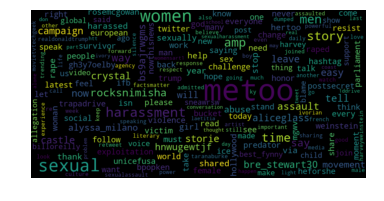

In [2]:
text = df[df.lang == 'en'].text.str.cat(sep = ' ').lower()
#text = text.replace('https', '').replace('RT', '').replace('co', '').replace('amp', '')
# Generate a word cloud image

stopwords = set(STOPWORDS)
stopwords.update(['https', 'RT', 'co'])

#wordcloud = WordCloud(width=600, height=300, max_font_size=60, collocations=False, stopwords=stopwords).generate(text)

wordcloud = WordCloud(width=1000, height=500, max_font_size=90, collocations=False, stopwords=stopwords).generate(text)

wordcloud.to_file("wc1.png")

# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
#plt.figure(figsize=(8, 6))
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

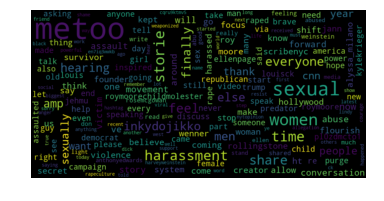

In [3]:
text = df2[df2.lang == 'en'].text.str.cat(sep = ' ').lower()
#text = text.replace('https', '').replace('RT', '').replace('co', '').replace('amp', '')
# Generate a word cloud image

stopwords = set(STOPWORDS)
stopwords.update(['https', 'RT', 'co'])

#wordcloud = WordCloud(width=600, height=300, max_font_size=60, collocations=False, stopwords=stopwords).generate(text)

wordcloud = WordCloud(width=1000, height=500, max_font_size=90, collocations=False, stopwords=stopwords).generate(text)

wordcloud.to_file("wc2.png")

# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
#plt.figure(figsize=(8, 6))
plt.axis("off")

## Extracting IDs

In [18]:
df_finite = df[pd.notnull(df['id'])]

In [24]:
df_finite.id.astype(int).to_csv('test.csv', index=False)

In [25]:
df2_finite = df2[pd.notnull(df2['id'])]

In [26]:
df2_finite.id.astype(int).to_csv('test2.csv', index=False)

## Getting tweets

In [4]:
import yaml
with open('config.yml') as f:
    # use safe_load instead load
    d = yaml.safe_load(f)

In [5]:
import tweepy

auth = tweepy.OAuthHandler(d['consumer_key'], d['consumer_secret'])
auth.set_access_token(d['access_token'], d['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
data = pd.read_csv('ids1.csv')
tweet_list = []
for i, row in data.iterrows():
    if i < 100:
        try:
            id_of_tweet = row['id']
            #print(id_of_tweet)
            tweet_list.append(api.get_status(id_of_tweet))
        except:
            print(str(id_of_tweet) + ' not present any more')

In [20]:
tweet_dicts = [tweet._json for tweet in tweet_list]
df = pd.DataFrame(tweet_dicts)
df.to_csv('data/tweets1.csv', index=False)
df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Sat Nov 04 20:39:28 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,926911797885657088,926911797885657088,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@BreezyWinter @jatemple @yashar @netflix I'm r...,True,"{'id': 2586084062, 'id_str': '2586084062', 'na..."
1,None,None,Thu Nov 02 08:47:32 +0000 2017,"{'hashtags': [{'text': 'MeToo', 'indices': [30...",NaN,0,False,None,926007858642214912,926007858642214912,...,NaN,NaN,NaN,2,False,{'created_at': 'Thu Nov 02 08:46:28 +0000 2017...,"<a href=""http://twitter.com/download/android"" ...",RT @fosslijensen: Psykolog om #MeToo: – Har pa...,False,"{'id': 41124241, 'id_str': '41124241', 'name':..."
2,None,None,Fri Nov 03 07:08:06 +0000 2017,"{'hashtags': [{'text': 'AcosoSexual', 'indices...",NaN,0,False,None,926345224258977792,926345224258977792,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",#AcosoSexual #Metoo https://t.co/JVthDMkJCl,False,"{'id': 709649007694520320, 'id_str': '70964900..."
3,None,None,Mon Oct 30 17:44:11 +0000 2017,"{'hashtags': [{'text': 'Rechtsstaat', 'indices...",NaN,0,False,None,925055745133023232,925055745133023232,...,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Wer so einen #Rechtsstaat hat, braucht keine F...",False,"{'id': 440292565, 'id_str': '440292565', 'name..."
4,None,None,Mon Oct 30 09:55:50 +0000 2017,"{'hashtags': [{'text': 'Metoo', 'indices': [0,...",NaN,0,False,None,924937883110334464,924937883110334464,...,{'created_at': 'Sun Oct 29 20:34:08 +0000 2017...,9.247361e+17,924736128816525312,0,False,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",#Metoo If for several women this movement is a...,True,"{'id': 738986651653902336, 'id_str': '73898665..."


In [21]:
data2 = pd.read_csv('ids2.csv')
tweet_list2 = []
for i, row in data2.iterrows():
    if i < 100:
        try:
            id_of_tweet = row['id']
            #print(id_of_tweet)
            tweet_list2.append(api.get_status(id_of_tweet))
        except:
            print(str(id_of_tweet) + ' not present any more')

929207023136260096 not present any more
929206448021823488 not present any more
929205715297849344 not present any more


In [23]:
tweet_dicts2 = [tweet._json for tweet in tweet_list2]
df2 = pd.DataFrame(tweet_dicts2)
df2.to_csv('data/tweets2.csv', index=False)
df2.head()


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Sat Nov 11 04:41:47 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2,False,None,929207504843739136,929207504843739136,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Yeah just what I thought, America still sucks,...",True,"{'id': 24087885, 'id_str': '24087885', 'name':..."
1,None,None,Sat Nov 11 04:41:40 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,7,False,None,929207473273126913,929207473273126913,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Why should women MPs repeat/say what younger/n...,True,"{'id': 406579529, 'id_str': '406579529', 'name..."
2,None,None,Sat Nov 11 04:41:39 +0000 2017,"{'hashtags': [{'text': 'MeToo', 'indices': [6,...",NaN,0,False,None,929207469728964608,929207469728964608,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Okay, #MeToo is getting out of control. Asking...",True,"{'id': 16722659, 'id_str': '16722659', 'name':..."
3,None,None,Sat Nov 11 04:41:12 +0000 2017,"{'hashtags': [{'text': 'MeToo', 'indices': [57...",NaN,0,False,None,929207356050640896,929207356050640896,...,NaN,NaN,NaN,18,False,{'created_at': 'Fri Nov 10 23:23:05 +0000 2017...,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @ETCanada: Watch: @SarahMcLachlan opens up...,False,"{'id': 36332025, 'id_str': '36332025', 'name':..."
4,None,None,Sat Nov 11 04:41:05 +0000 2017,"{'hashtags': [{'text': 'MeToo', 'indices': [67...",NaN,64,False,None,929207327940599808,929207327940599808,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@rosemcgowan “Slandering all men?” Another one...,False,"{'id': 19057726, 'id_str': '19057726', 'name':..."


## Word Clouds

(-0.5, 999.5, 499.5, -0.5)

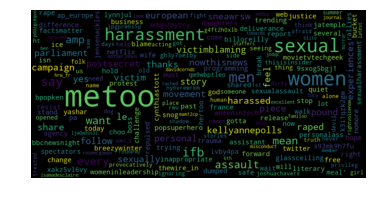

In [25]:
df = pd.read_csv('data/tweets1.csv')

text = df[df.lang == 'en'].text.str.cat(sep = ' ').lower()
#text = text.replace('https', '').replace('RT', '').replace('co', '').replace('amp', '')
# Generate a word cloud image

stopwords = set(STOPWORDS)
stopwords.update(['https', 'RT', 'co'])

#wordcloud = WordCloud(width=600, height=300, max_font_size=60, collocations=False, stopwords=stopwords).generate(text)

wordcloud = WordCloud(width=1000, height=500, max_font_size=90, collocations=False, stopwords=stopwords).generate(text)

wordcloud.to_file("wc1_test.png")

# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
#plt.figure(figsize=(8, 6))
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

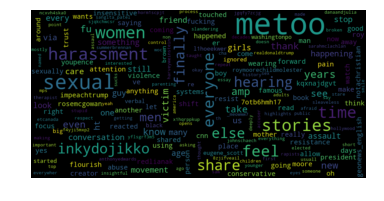

In [26]:
df2 = pd.read_csv('data/tweets2.csv')

text = df2[df2.lang == 'en'].text.str.cat(sep = ' ').lower()
#text = text.replace('https', '').replace('RT', '').replace('co', '').replace('amp', '')
# Generate a word cloud image

stopwords = set(STOPWORDS)
stopwords.update(['https', 'RT', 'co'])

#wordcloud = WordCloud(width=600, height=300, max_font_size=60, collocations=False, stopwords=stopwords).generate(text)

wordcloud = WordCloud(width=1000, height=500, max_font_size=90, collocations=False, stopwords=stopwords).generate(text)

wordcloud.to_file("wc2_test.png")

# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
#plt.figure(figsize=(8, 6))
plt.axis("off")